# Analysis of the collected data

The data was collected from the BoardGameGeek API ("https://boardgamegeek.com/xmlapi2/thing
"). It contains a comprehensive collection of board games, with a wide range of information including game names, rankings, ratings, descriptions, and various other details.

Firstly, we will load the data and analyze each column to retrieve only relevant information.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df1 = pd.read_csv("bgg_boardgames_full_sorted_part01.csv")
df2 = pd.read_csv("bgg_boardgames_full_sorted_part02.csv")
df3 = pd.read_csv("bgg_boardgames_full_sorted_part03.csv")

# Concatenate the dataframes while maintaining their order
df = pd.concat([df1, df2, df3], ignore_index=True)

print(df.head(1))

C:\Users\lucas\AppData\Local\Temp\ipykernel_10672\638423124.py:6: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("bgg_boardgames_full_sorted_part01.csv")


       id       type               name  \
0  224517  boardgame  Brass: Birmingham   

                                           alt_names  yearpublished  \
0  Brass. Бирмингем, Brass. Бірмінгем, ブラス：バーミンガム...           2018   

                                         description  \
0  Brass: Birmingham is an economic strategy game...   

                                               image  \
0  https://cf.geekdo-images.com/x3zxjr-Vw5iU4yDPg...   

                                           thumbnail  minplayers  maxplayers  \
0  https://cf.geekdo-images.com/x3zxjr-Vw5iU4yDPg...           2           4   

   ...   stddev  median  owned  trading wanting wishing numweights  \
0  ...  1.42058       0  77098      288    1749   20493       2638   

  averageweight rank_boardgame           ranks_other  
0        3.8685              1  Strategy Game Rank:1  

[1 rows x 37 columns]


We will start our investigation on the first and the second column analyzing if there are repeated or null id's and if in the second column there is only one type of game or null value (boardgame)

There are 0 duplicated rows
There are 0 duplicated IDs
There are 0 null IDs
There are 0 null types


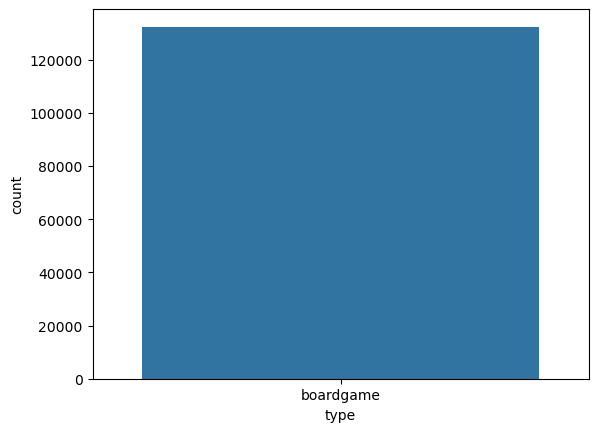

In [2]:
duplicateds = df[df.duplicated()]

print(f'There are {duplicateds.shape[0]} duplicated rows') # duplicated rows

duplicatedsId = df[df.duplicated(subset=["id"])]

print(f'There are {duplicatedsId.shape[0]} duplicated IDs')  # duplicated ids

null_ids = df[df["id"].isna()].shape[0]
null_type = df[df["type"].isna()].shape[0]

print(f'There are {null_ids} null IDs')
print(f'There are {null_type} null types')

sb.countplot(df, x = "type")
plt.show()

As we observe, all entries in the "type" column are labeled as "boardgame," which is expected. Therefore, we can safely remove this column, as it does not contribute meaningfully to our analysis.

We will now validate key parameters, starting with the number of players and the name field, to identify any irregular or unexpected values.

In [3]:
# Check for validity in key columns
invalid_players = df[(df['minplayers'].isnull()) | (df['maxplayers'].isnull()) | (df['minplayers'] == 0) | (df['maxplayers'] == 0)]
invalid_names = df[df['name'].isnull()]
print(f"Rows with invalid player numbers: {invalid_players.shape[0]}")
print(f"Rows with missing names: {invalid_names.shape[0]}")
if not invalid_players.empty:
    print("Sample invalid player rows:")
    print(invalid_players.head())
if not invalid_names.empty:
    print("Sample rows with missing names:")
    print(invalid_names.head())

Rows with invalid player numbers: 5811
Rows with missing names: 0
Sample invalid player rows:
          id       type                                               name  \
3325   21804  boardgame                             Traditional Card Games   
3893   18291  boardgame                              Unpublished Prototype   
4006   37301  boardgame                                            Decktet   
5137   23953  boardgame                           Outside the Scope of BGG   
5837  170669  boardgame  Old School Tactical: Volume 1 – Fighting on th...   

                                 alt_names  yearpublished  \
3325   Kaarten, Kaartspelen, Playing Cards              0   
3893                                   NaN              0   
4006  Deco Decktet, Double Decktet, Дектет           2008   
5137                                   NaN              0   
5837                                   NaN           2016   

                                            description  \
3325  Tradi

Although all games have valid names, 5,811 entries lack meaningful player count data—either null or zero values for minimum or maximum players. This suggests missing metadata, which may require external validation. Given the dataset’s size, we can afford to discard these entries to maintain analytical consistency.

Next, we turn to the 'alt names' column, which records alternative titles for each game. We'll assess this field for missing values, keeping in mind that not all games are expected to have alternate names. 

In [4]:
print(f'The column \'alt_names\' has {df[df["alt_names"].isna()].shape[0]} missing values.')

The column 'alt_names' has 108918 missing values.


While the column shows a high number of missing values, this is not concerning—alternative names are optional, and their absence does not compromise the dataset’s integrity.

Next, we are going to analize the 'yearpublished' column that lists the year o pushlisment of each game.

The column 'yearpublished' has 10618 missing values.
The column 'yearpublished' has 852 values after 2025. This means these games were not released for now.


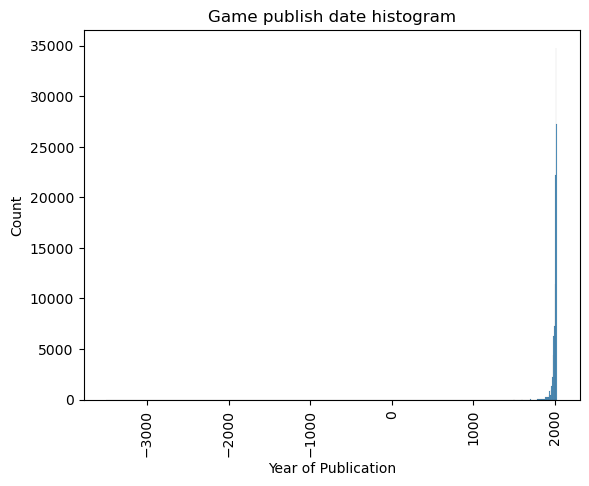

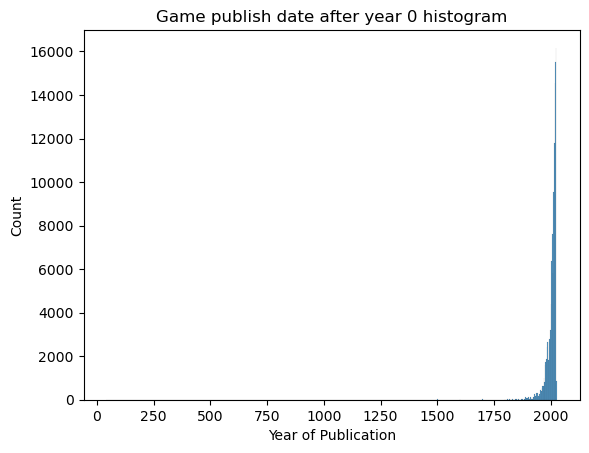

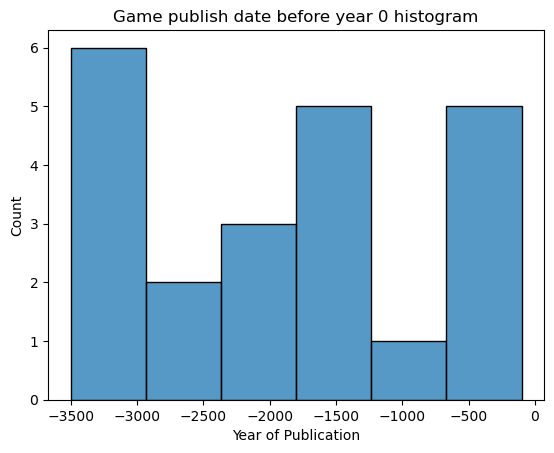

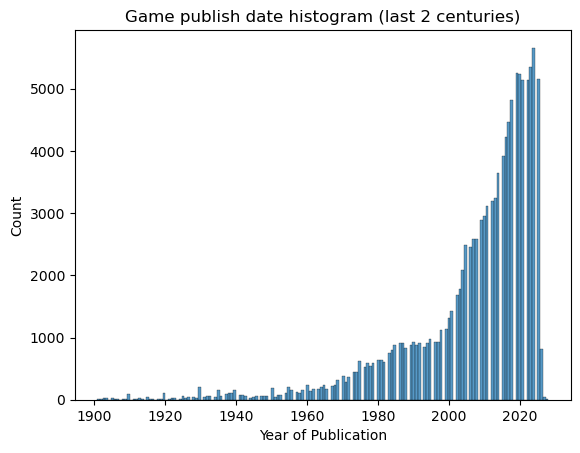

In [16]:
print(f'The column \'yearpublished\' has {df[df["yearpublished"].isna()].shape[0] + df[df["yearpublished"] == 0].shape[0]} missing values.')
print(f'The column \'yearpublished\' has {df[df["yearpublished"] > 2025].shape[0]} values after 2025. This means these games were not released for now.')
non_null_years_pub = df.loc[(df["yearpublished"].notna()) & (df["yearpublished"] != 0)]
sb.histplot(non_null_years_pub, x = "yearpublished")

plt.xlabel("Year of Publication")
plt.ylabel("Count")
plt.title("Game publish date histogram")
plt.xticks(rotation = 90)
plt.show()

positive_years_pub = non_null_years_pub.loc[df["yearpublished"] > 0]
negative_years_pub = non_null_years_pub.loc[df["yearpublished"] < 0]
recent_releases = non_null_years_pub.loc[df["yearpublished"] > 1900]
sb.histplot(positive_years_pub, x = "yearpublished")
plt.xlabel("Year of Publication")
plt.ylabel("Count")
plt.title("Game publish date after year 0 histogram")
plt.show()
sb.histplot(negative_years_pub, x = "yearpublished")
plt.xlabel("Year of Publication")
plt.ylabel("Count")
plt.title("Game publish date before year 0 histogram")
plt.show()
sb.histplot(recent_releases, x = "yearpublished")
plt.xlabel("Year of Publication")
plt.ylabel("Count")
plt.title("Game publish date histogram (last 2 centuries)")
plt.show()



"The dataset includes games spanning a wide range of publication dates, with some entries even predating the Common Era. However, the majority were released within the last two centuries, with a strong concentration in the 21st century—particularly over the past decade. Notably, there are entries with missing publication dates, as well as others with future dates beyond the current year (2025), indicating that these games have not yet been released. To ensure temporal consistency and analytical reliability, these records should be excluded from further analysis. 

Now we will check if there are null or empty descriptions.

In [ ]:
invalid_description = df.loc[df["description"].isna() | (df["description"].str.strip() == "")]
print(f'There are {invalid_description.shape[0]} null descriptions')

There are 37
16625     NaN
34433     NaN
45237     NaN
62222     NaN
67062     NaN
71727     NaN
72853     NaN
73013     NaN
74368     NaN
74689     NaN
76557     NaN
77169     NaN
77447     NaN
78362     NaN
79845     NaN
79846     NaN
79847     NaN
79973     NaN
81111     NaN
81112     NaN
81192     NaN
81853     NaN
86902     NaN
87154     NaN
87160     NaN
93665     NaN
96848     NaN
99444     NaN
100175    NaN
100188    NaN
101821    NaN
112331    NaN
113336    NaN
115201    NaN
116318    NaN
116503    NaN
123370    NaN
Name: description, dtype: object


The number of entries with null or empty descriptions is minimal, making it reasonable to discard them without impacting the number os entries in the final dataset.

Next, we examine the 'image' and 'thumbnail' columns, which contain links to visual assets associated with each game. Since the search system is primarily text-based, these visual references offer limited utility for our analysis. Therefore, it is reasonable to exclude both columns from the dataset.